# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Tiền xử lý dữ liệu

In [2]:
# Đọc file dữ liệu
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\VCB.csv")
df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,11929.0
1,11841.0
2,11797.0
3,11885.0
4,11797.0
...,...
2491,81500.0
2492,81200.0
2493,81100.0
2494,80900.0


In [3]:
# Chia train test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 6.Tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ Last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá đóng cửa trong 30 ngày tới
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[95812.75777393 95848.8454075  95884.93304106 95921.02067463
 95957.10830819 95993.19594175 96029.28357532 96065.37120888
 96101.45884245 96137.54647601 96173.63410958 96209.72174314
 96245.8093767  96281.89701027 96317.98464383 96354.0722774
 96390.15991096 96426.24754453 96462.33517809 96498.42281166
 96534.51044522 96570.59807878 96606.68571235 96642.77334591
 96678.86097948 96714.94861304 96751.03624661 96787.12388017
 96823.21151373 96859.2991473 ]


In [6]:
y_pred = model.predict(np.array(test_data.index).reshape(-1, 1))

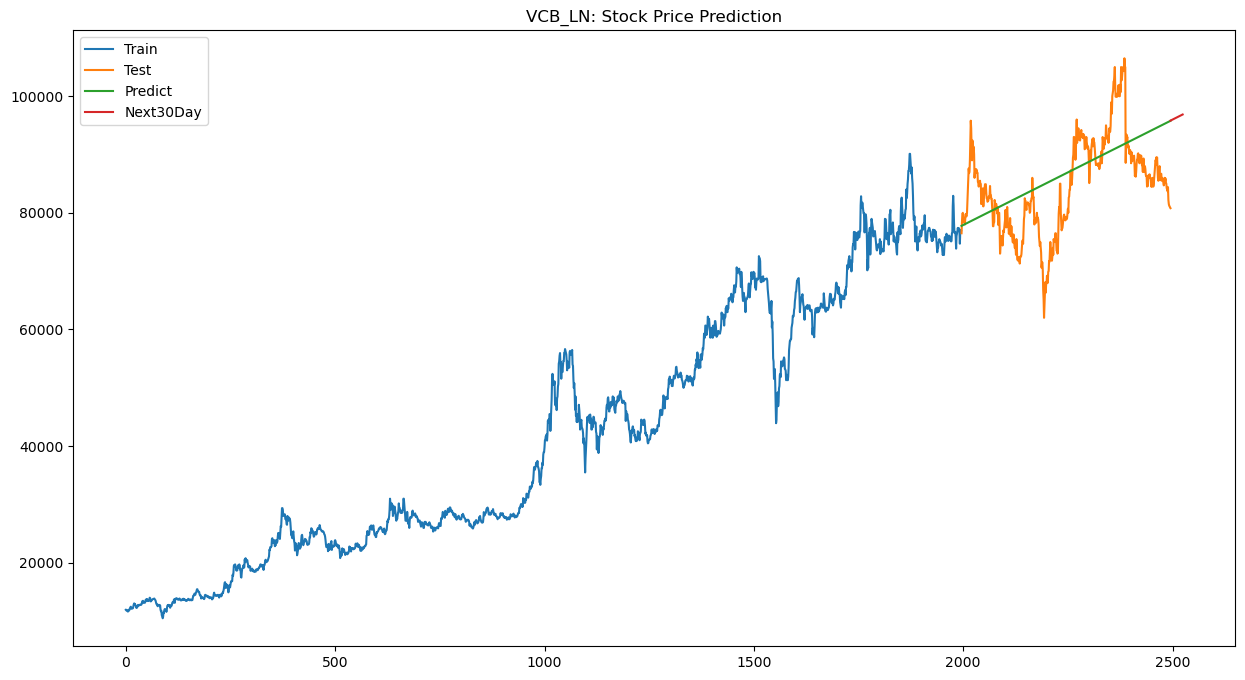

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predict','Next30Day'])
plt.title('VCB_LN: Stock Price Prediction')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
import numpy as np
# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100
# Tính toán RMSE, MAPE, MDA trên tập test
test_score_rmse=np.sqrt(mean_squared_error(test_data, y_pred))
test_score_mape=mean_absolute_percentage_error(test_data, y_pred) * 100
test_score_mda=calculate_mda(test_data, y_pred)
msle = mean_squared_log_error(test_data, y_pred)
print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 7562.787413975367
MAPE trên tập test là: 7.542698892282419 %
MDA trên tập test là: 0.0 %
MSLE trên tập test là: 0.008187231996938356


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19292\640355832.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
